In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset('titanic')
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parch        f

#  1. Generate Summary Statistics

In [29]:
# Basic overview
print(df.info())  # Data types + non-null counts
print("-------------\n")
print(df.describe())  # Mean, std, min, 25%, 50%, 75%, max
print("-------------\n")
print(df.describe(include='object'))  # For categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
-------------

         survived      pclass         age       sibsp      

In [21]:
# Additional stats
print("Median Age:", df['age'].median())
print("-------------\n")
print("Mode of Embarked:", df['embarked'].mode()[0])
print("------------\n")
print("Missing Values:\n", df.isnull().sum())


Median Age: 28.0
-------------

Mode of Embarked: S
------------

Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


#  2. Create Histograms & Boxplots for Numeric Features

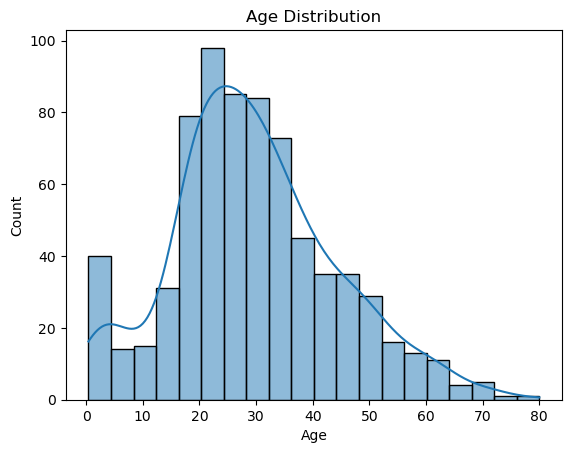

In [31]:
# Histogram: Age
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

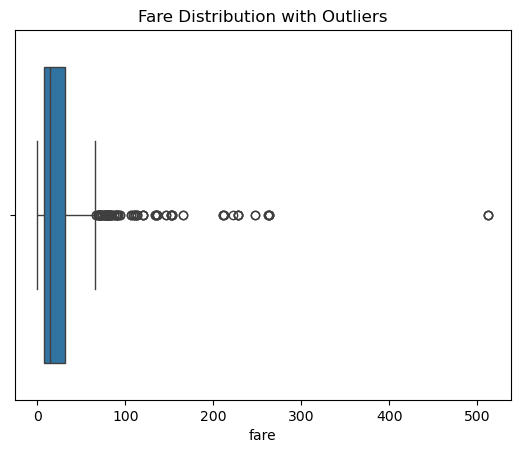

In [33]:
# Boxplot: Fare
sns.boxplot(x=df['fare'])
plt.title('Fare Distribution with Outliers')
plt.show()

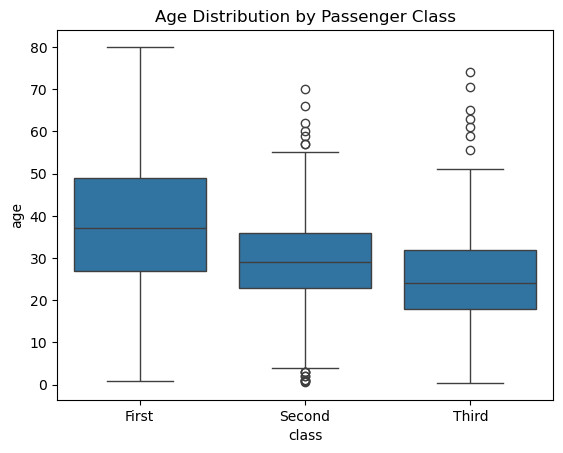

In [35]:
# Boxplot by Class: Age vs Class
sns.boxplot(x='class', y='age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()

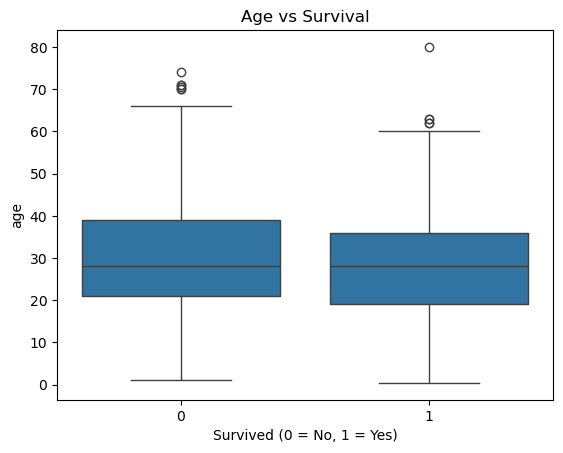

In [37]:
# Boxplot: Survival by Age
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age vs Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

# 3. Use Pairplot & Correlation Matrix for Feature Relationships

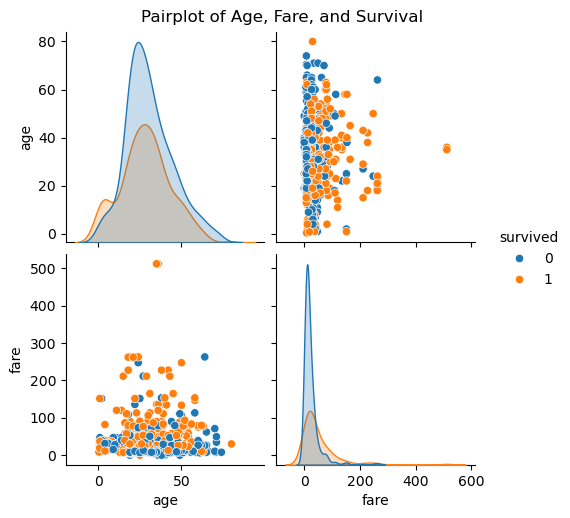

In [39]:
# Pairplot of numeric features
sns.pairplot(df[['age', 'fare', 'survived']].dropna(), hue='survived')
plt.suptitle('Pairplot of Age, Fare, and Survival', y=1.02)
plt.show()

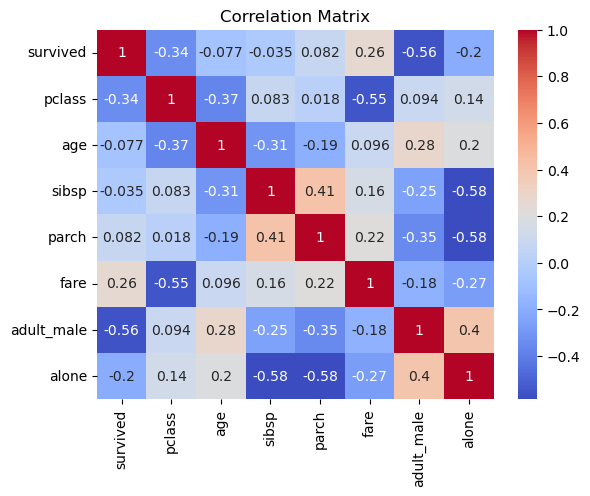

In [41]:
# Correlation Matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4.Identify Patterns, Trends, or Anomalie

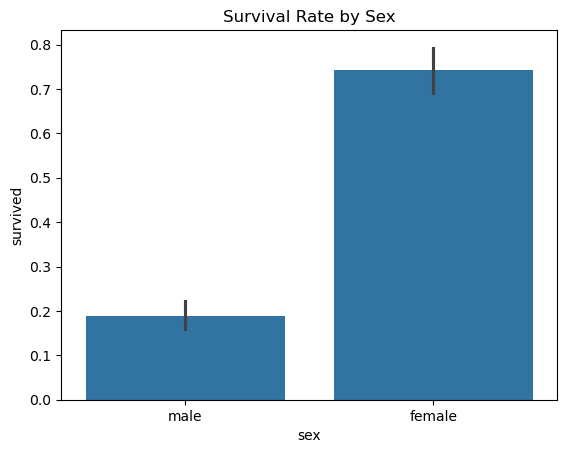

In [43]:
# Survival rate by sex
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

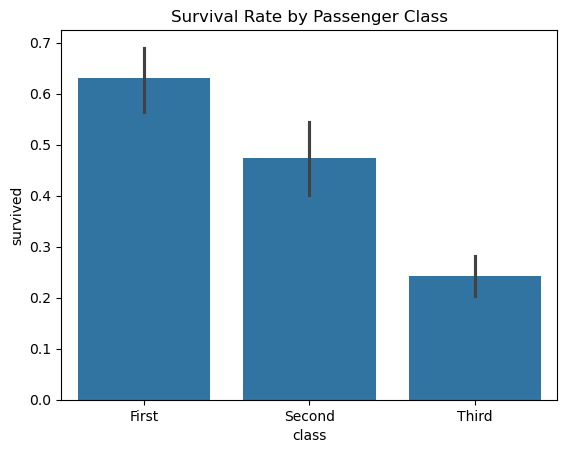

In [45]:
# Survival rate by class
sns.barplot(x='class', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

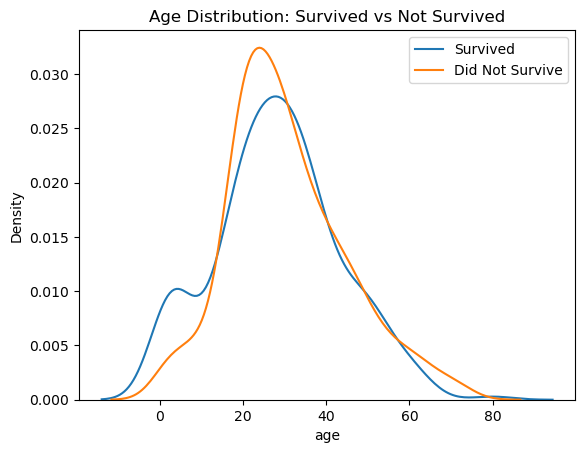

In [47]:
# Age distribution of survivors
sns.kdeplot(df[df['survived'] == 1]['age'].dropna(), label='Survived')
sns.kdeplot(df[df['survived'] == 0]['age'].dropna(), label='Did Not Survive')
plt.title('Age Distribution: Survived vs Not Survived')
plt.legend()
plt.show()

# 5. Basic Feature-Level Inferences from Visuals

In [49]:
# Mean survival rate by sex
print(df.groupby('sex')['survived'].mean())
print("-------------\n")

# Mean survival rate by class
print(df.groupby('class')['survived'].mean())
print("-------------\n")

# Average fare by class
print(df.groupby('class')['fare'].mean())


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
-------------

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64
-------------

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64


C:\Users\STRON\AppData\Local\Temp\ipykernel_4252\1908485634.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('class')['survived'].mean())
C:\Users\STRON\AppData\Local\Temp\ipykernel_4252\1908485634.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('class')['fare'].mean())
